In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Feature selection using Decison Tree

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df['Outcome'],test_size=0.2,random_state=1)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(614, 8)
(154, 8)
(614,)
(154,)


In [7]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


In [10]:
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
cols = x_train.columns

In [33]:
(sorted(dt.feature_importances_,reverse=True))

[np.float64(0.28515432097055543),
 np.float64(0.2003462853466614),
 np.float64(0.15378480431261912),
 np.float64(0.10447203551181354),
 np.float64(0.10376389997084846),
 np.float64(0.07295287566908899),
 np.float64(0.05149512670436955),
 np.float64(0.028030651514043454)]

In [34]:
print(rf.estimators_[0].feature_importances_)
print(rf.estimators_[1].feature_importances_)

[0.09346003 0.16869162 0.11976055 0.06754946 0.12694903 0.12648711
 0.10849197 0.18861023]
[0.06520742 0.21463471 0.11770754 0.073748   0.04265331 0.16189071
 0.10799248 0.21616583]


In [35]:
rf.feature_importances_

array([0.08471307, 0.24623539, 0.09510498, 0.07032593, 0.07654431,
       0.16515334, 0.1244443 , 0.13747868])

<Axes: >

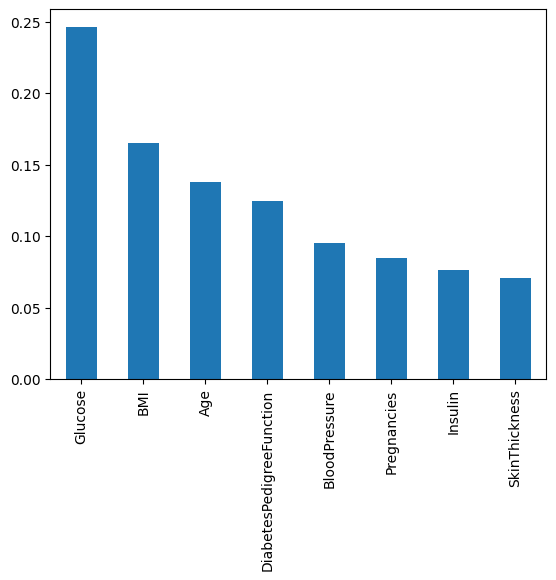

In [36]:
x = pd.Series(np.abs(rf.feature_importances_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

# Select From Model 

In [37]:
model = DecisionTreeClassifier()

In [38]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold='mean')

In [40]:
sfm.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,threshold,'mean'
,prefit,False
,norm_order,1
,max_features,None
,importance_getter,'auto'
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [41]:
sfm.get_support(indices=True)

array([1, 5, 7])

In [42]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BMI', 'Age'], dtype=object)

In [45]:
X_train_trans = sfm.transform(x_train)

X_train_trans = pd.DataFrame(x_train,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

,Glucose,BMI,Age
663,145,37.9,40
712,129,41.2,38
161,102,37.2,45
509,120,25.0,64
305,120,39.7,29
...,...,...,...
645,157,39.4,30
715,187,33.9,34
72,126,43.4,42
235,171,43.6,26


# Recursive Feature Selection

In [47]:
df = sns.load_dataset('iris')

In [48]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
x = df.iloc[:,:-1]

In [50]:
y = df.iloc[:,-1]

In [52]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
RF = RandomForestClassifier(n_estimators=2)
DT = DecisionTreeClassifier()


In [54]:
RF.fit(x,y)

,n_estimators,2
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
DT.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [57]:
DT.feature_importances_

array([0.02666667, 0.        , 0.05072262, 0.92261071])

In [59]:
RF.n_estimators

2

In [60]:
RF.feature_importances_

array([0.01929601, 0.00926083, 0.7398629 , 0.23158027])

In [61]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [62]:
DT.feature_importances_

array([0.02666667, 0.        , 0.05072262, 0.92261071])

In [63]:
o = pd.DataFrame()

In [66]:
o['features']=x.columns
o['score']=DT.feature_importances_

In [67]:
o

,features,score
0,sepal_length,0.026667
1,sepal_width,0.000000
2,petal_length,0.050723
3,petal_width,0.922611


In [68]:
x.drop(columns='sepal_width',inplace=True)
x.head()

,sepal_length,petal_length,petal_width
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [70]:
rf = RandomForestClassifier()
rf.fit(x,y)

rf.feature_importances_

array([0.1940542 , 0.36630684, 0.43963895])

In [72]:
x.drop(columns='sepal_length',inplace=True)
x.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [74]:
rf = RandomForestClassifier()
rf.fit(x,y)

rf.feature_importances_

array([0.47185622, 0.52814378])

In [75]:
x.drop(columns='petal_length',inplace=True)
x.head()


,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


# Sklearn RFE 

In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

In [77]:
# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")


Feature ranking:
sepal_length: 3
sepal_width: 4
petal_length: 2
petal_width: 1


# Mutual Info 

In [78]:
data = {
    'A': ['a1', 'a2', 'a1', 'a1', 'a2', 'a1', 'a2', 'a2'],
    'B': ['b1', 'b2', 'b2', 'b1', 'b1', 'b2', 'b2', 'b1']
}

df = pd.DataFrame(data)

In [79]:
marginal_prob = pd.crosstab(df['A'], df['B'], margins=True, normalize='all')
marginal_prob


B,b1,b2,All
A,,,
a1,0.25,0.25,0.5
a2,0.25,0.25,0.5
All,0.50,0.50,1.0


In [80]:
from sklearn.feature_selection import mutual_info_classif

In [83]:
# Compute mutual information
mi = mutual_info_classif(X, y)

# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i}: Mutual Information = {mi_value}")


Feature 0: Mutual Information = 0.4761569743152805
Feature 1: Mutual Information = 0.24291371056716327
Feature 2: Mutual Information = 0.9989957749287557
Feature 3: Mutual Information = 0.9817312486749519


In [84]:
    from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]
